0


C:\Users\lcooper7\AppData\Local\Temp/ipykernel_17016/1044110213.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


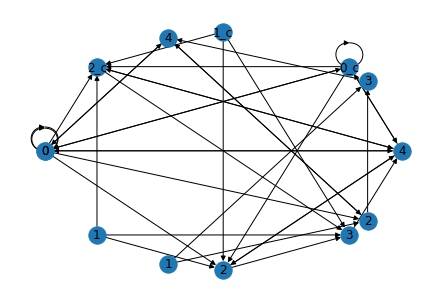

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
fig=plt.figure()
vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
nx.draw_shell(G,with_labels=True)

duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes(G,duplicationGenes)
nx.draw_shell(G_dup,with_labels=True)
fig.show()

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=100
delta=0.5
flucLow=0.59
flucHigh=0.61


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.99:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.01:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.01:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.01:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.99:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.99:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

min 10000 0 0 0 0.6078431372549031


KeyboardInterrupt: 

[0, 1, 2]
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
[0, 1, 2, '2_1', '1_2', '2_1_3', '2_1_4', '2_1_3_5', '1_2_6', '2_1_3_7', '2_1_3_8', '2_1_3_7_9', '2_1_3_10']
1
1
1
1
14 14


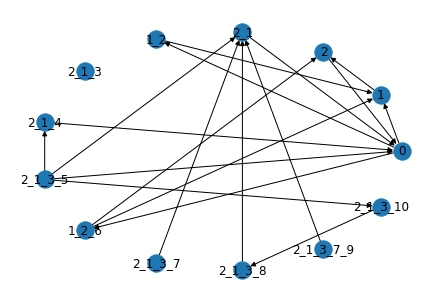

In [2]:
G=nx.DiGraph(nx.scale_free_graph(2))
G,G3=gf.network_birth(G,10,10,0.5,0.5)
G1,G2=gf.network_birth(G,1,1,0.5,0.5)
print(len(list(G1.nodes)),len(list(G2.nodes)))
nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)

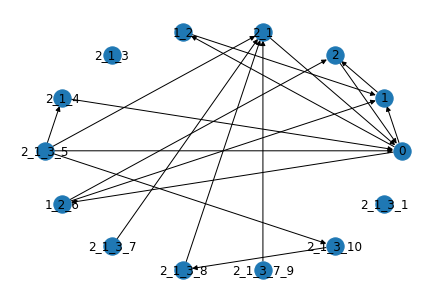

In [3]:
nx.draw_circular(G1,with_labels=True)

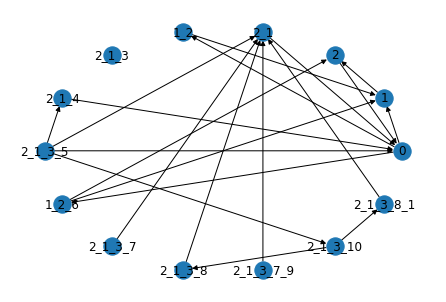

In [4]:
nx.draw_circular(G2,with_labels=True)

18
3
EC: 0.16666666666666666
ICS: 0.16666666666666666
S3: 0.09090909090909091


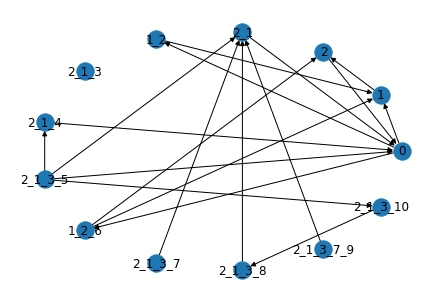

In [5]:
sourceEdges= len(list(G1.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
nx.draw_circular(G2_ind,with_labels=True)
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))

In [6]:
#G1=nx.DiGraph(nx.scale_free_graph(10000))
#G2=nx.DiGraph(nx.scale_free_graph(10000))

G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)




In [9]:
for gamma in range(2,6000,10):
    G1=nx.convert_node_labels_to_integers(G1_orig)
    G2=nx.convert_node_labels_to_integers(G2_orig)
    idealGamma=0
    maxEC=0
    alignVec=gf.NF_many_to_many(G1,G2,32,0.8,gamma)
    mapping = dict(alignVec)
    G1=nx.relabel_nodes(G1,mapping)
    sourceEdges= len(list(G1.edges()))
    
    conservedEdge=0
    for x in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
        for y in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
            if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
                conservedEdge=conservedEdge+1
    EC = conservedEdge/sourceEdges
    print("EC:",conservedEdge/sourceEdges)

    G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
    inducedEdges=len(list(G2_ind.edges))
    print("ICS:",conservedEdge/inducedEdges)
    print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
    if EC > maxEC:
        maxEC=EC
        idealGamma=gamma
    print(gamma,idealGamma)

EC: 0.07692307692307693
ICS: 0.3333333333333333
S3: 0.06666666666666667
EC: 0.5
ICS: 0.5294117647058824
S3: 0.34615384615384615
EC: 0.5294117647058824
ICS: 0.6428571428571429
S3: 0.4090909090909091
EC: 0.5294117647058824
ICS: 0.6428571428571429
S3: 0.4090909090909091
EC: 0.7647058823529411
ICS: 0.9285714285714286
S3: 0.7222222222222222
EC: 0.7647058823529411
ICS: 0.9285714285714286
S3: 0.7222222222222222
EC: 0.7647058823529411
ICS: 0.9285714285714286
S3: 0.7222222222222222
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0.9
EC: 1.0
ICS: 0.9
S3: 0

In [7]:
alignVec=gf.NF_many_to_many(G1,G2,32,0.8)
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
print(alignVec)
print(G1.edges)
print(G2.edges)


2.75
4.466666666666667
4097.4
3 3
2.75
28.6
34.64533333333334
65.0
129.0
8 8
2.75
28.6
34.64533333333334
65.0
4 4
2.75
28.6
34.64533333333334
52.0
56.8
1025.0
12 12
2.75
28.6
34.64533333333334
52.0
56.8
6 6
2.75
28.6
34.64533333333334
52.0
4 8
2.75
28.6
34.64533333333334
52.0
8 4
2.75
28.6
34.64533333333334
45.800000000000004
9 9
2.75
89.6
2 2
33.0
41.760000000000005
2 6
33.0
34.64533333333334
3 12
33.0
35.13333333333333
6 4
33.0
0 0
1.6400000000000001
17.384000000000004
33.0
46.080000000000005
9 2
1.6400000000000001
17.384000000000004
33.0
0 5
1.6400000000000001
17.384000000000004
32.8
33.0
0 13
1.6400000000000001
17.384000000000004
32.8
33.0
10 10
1.6400000000000001
17.384000000000004
32.8
33.0
11 11
1.6400000000000001
17.384000000000004
32.8
33.0
12 9
1.6400000000000001
17.384000000000004
32.8
33.0
13 0
1.6400000000000001
17.384000000000004
32.8
33.0
13 5
1.6400000000000001
17.384000000000004
32.8
33.0
13 13
1.6400000000000001
17.384000000000004
32.8
0 9
1.6400000000000001
17.384000

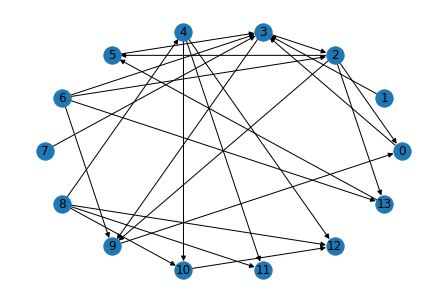

In [8]:
pos=nx.circular_layout(G2)
nx.draw(G2,with_labels=True,pos=pos)

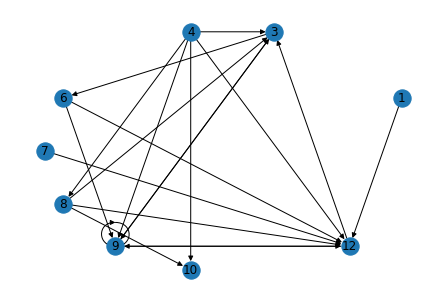

In [9]:
nx.draw(G1,with_labels=True,pos=pos)

In [13]:
sourceEdges= len(list(G1.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))

19
6
EC: 0.3157894736842105
ICS: 0.5454545454545454
S3: 0.25


8 4
12 3
3 12
4 8
11 10
6 6
9 9
1 1
7 7


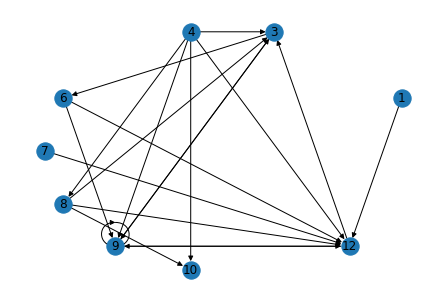

In [11]:
G=nx.convert_node_labels_to_integers(G)
alignVec=gf.NF(G,G1,32,0.8)
mapping = dict(alignVec)
G=nx.relabel_nodes(G,mapping)
nx.draw(G1,with_labels=True,pos=pos)

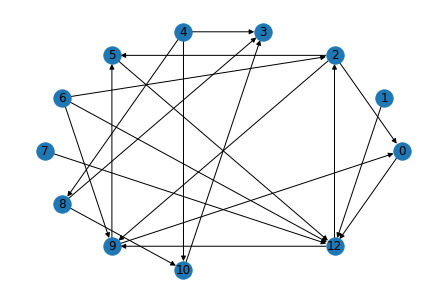

In [12]:
nx.draw(G,with_labels=True,pos=pos)

In [74]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

AttributeError: module 'gene_functions' has no attribute 'graph_edit_distance'